# <font color='blue'>SENG 474 - Assignment 1</font>


Student Name:  Mek Obchey \
Student ID:    V00880355 \
Spring 2020


In [34]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# import dataset
df = pd.read_csv('./processed.cleveland.data')
df = df.replace('?',np.NaN)
df.apply(pd.to_numeric)
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# Group labels into two sets {0} = 0 and {1,2,3,4} = 1
y[y > 0] = 1

# replace missing values denoted '?' with the mean of its column 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean', verbose=0)
imputer.fit(X[:])
X[:,:] = imputer.transform(X[:])

# splitting the dataset into the Training set and Test set by 20%.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# create a classifier
from sklearn.tree import DecisionTreeClassifier



In [60]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


from sklearn.pipeline import Pipeline
degrees = [1, 4, 15]

from sklearn.model_selection import cross_val_score
   
    

#     X_test = np.linspace(0, 1, 100)
#     plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
#     plt.plot(X_test, true_fun(X_test), label="True function")
#     plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
#     plt.xlabel("x")
#     plt.ylabel("y")
#     plt.xlim((0, 1))
#     plt.ylim((-2, 2))
#     plt.legend(loc="best")
#     plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
#         degrees[i], -scores.mean(), scores.std()))
# plt.show()

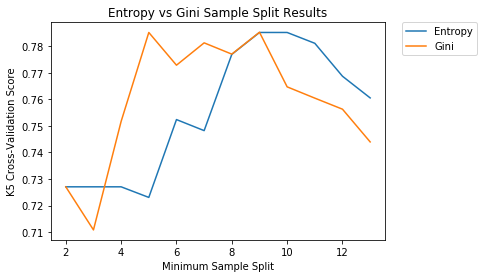

In [29]:
#https://stackoverflow.com/questions/35097003/cross-validation-decision-trees-in-sklearn
#Dimosthenis

#classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, min_samples_split=20)
#classifier.fit(X_train, y_train)
from sklearn.model_selection import KFold, cross_val_score

#KFold Cross Validation
min_samples_split_1 = []
for i in range(2,14):
    classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_leaf_nodes=i)
    scores = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)
    min_samples_split_1.append(scores.mean())

min_samples_split_2 = []
for i in range(2,14):
    classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0, max_leaf_nodes=i)
    scores = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)
    min_samples_split_2.append(scores.mean())

    
from matplotlib import pyplot as plt
plt.title('Entropy vs Gini Sample Split Results')
plt.xlabel('Minimum Sample Split')
plt.ylabel('K5 Cross-Validation Score')
X_grid = np.arange(2,14,1)
X_grid = X_grid.reshape((len(X_grid), 1))
line1 = plt.plot(X_grid, min_samples_split_1, label='Entropy')
line2 = plt.plot(X_grid, min_samples_split_2, label='Gini')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#y_pred = classifier.predict(X_test)
# target_names = ['class 0', 'class 1,2,3,4']
#print(classification_report(y_test, y_pred, target_names=target_names))

In [274]:
#for visualization only
# from sklearn.tree import export_graphviz 
# from IPython.display import Image  
# from sklearn import tree
# import pydotplus

# classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)
# classifier.fit(X_train, y_train)
# target_names = ['class 0', 'class 1,2,3,4']
# y_pred = classifier.predict(X_test)

#################################################################
#post pruning by David Dale : https://stackoverflow.com/questions/49428469/pruning-decision-trees
# from sklearn.tree._tree import TREE_LEAF
# def prune_index(inner_tree, index, threshold):
#     if inner_tree.value[index].min() < threshold:
#         # turn node into a leaf by "unlinking" its children
#         inner_tree.children_left[index] = TREE_LEAF
#         inner_tree.children_right[index] = TREE_LEAF
#     # if there are shildren, visit them as well
#     if inner_tree.children_left[index] != TREE_LEAF:
#         prune_index(inner_tree, inner_tree.children_left[index], threshold)
#         prune_index(inner_tree, inner_tree.children_right[index], threshold)

# print(sum(classifier.tree_.children_left < 0))
# # start pruning from the root
# prune_index(classifier.tree_, 0, 5)
# sum(classifier.tree_.children_left < 0)
#################################################################o
# dot_data = tree.export_graphviz(classifier, out_file=None,  
#                 filled=True, rounded=True,
#                 special_characters=True, feature_names=df.columns[:-1])
# graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
# Image(graph.create_png())

#samples = # of trained samples
#value = class probability

## References: 
https://scikit-learn.org \
Machine Learning A-Z by Udemy: https://www.udemy.com/course/machinelearning/ \
https://matplotlib.org/tutorials/intermediate/legend_guide.html